In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns   
import os

from sklearn.preprocessing import MinMaxScaler
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning) # IF any of my package is outdated 

In [23]:
os.chdir("C:\\GUVI\\Space_-Classification")
df = pd.read_csv('Skyserver_SQL2_27_2018 6_51_39 PM.csv') 
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [24]:
df.shape

(10000, 18)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [26]:
df['class'].value_counts()

class
GALAXY    4998
STAR      4152
QSO        850
Name: count, dtype: int64

In [27]:
#df.drop(['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid'], axis = 1, inplace = True)
df.head

<bound method NDFrame.head of              objid          ra        dec         u         g         r  \
0     1.237650e+18  183.531326   0.089693  19.47406  17.04240  15.94699   
1     1.237650e+18  183.598370   0.135285  18.66280  17.21449  16.67637   
2     1.237650e+18  183.680207   0.126185  19.38298  18.19169  17.47428   
3     1.237650e+18  183.870529   0.049911  17.76536  16.60272  16.16116   
4     1.237650e+18  183.883288   0.102557  17.55025  16.26342  16.43869   
...            ...         ...        ...       ...       ...       ...   
9995  1.237650e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9996  1.237650e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9997  1.237650e+18  131.552562  51.666986  18.75818  17.77784  17.51872   
9998  1.237650e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999  1.237650e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z   run  rerun  camcol  field     specobjid   

C:\Users\dheek\AppData\Local\Temp\ipykernel_20784\2771909948.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['class'] == 'STAR'].redshift, bins = 30, ax = axes[0])
C:\Users\dheek\AppData\Local\Temp\ipykernel_20784\2771909948.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot

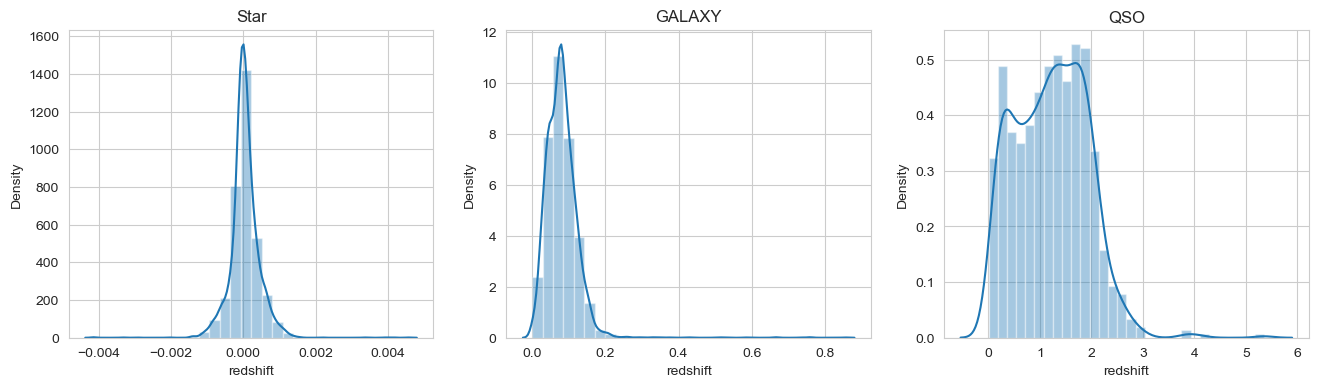

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(16,4)) 
ax = sns.distplot(df[df['class'] == 'STAR'].redshift, bins = 30, ax = axes[0]) 
ax = ax.set_title('Star')
ax = sns.distplot(df[df['class'] == 'GALAXY'].redshift, bins = 30, ax = axes[1]) 
ax = ax.set_title('GALAXY')
ax = sns.distplot(df[df['class'] == 'QSO'].redshift, bins = 30, ax = axes[2]) 
ax = ax.set_title('QSO')

C:\Users\dheek\AppData\Local\Temp\ipykernel_20784\3827163579.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x = df['class'], y = df['dec'], palette = 'coolwarm')


Text(0.5, 1.0, 'dec')

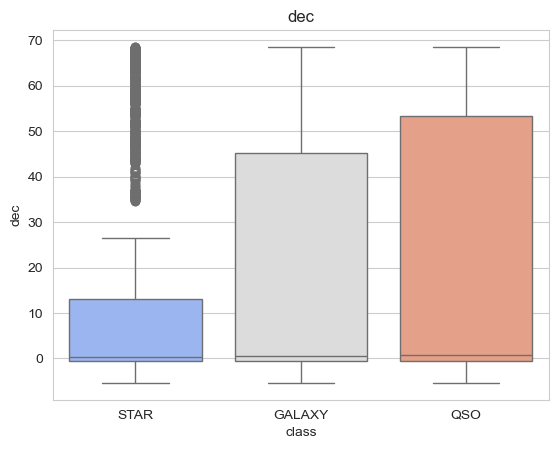

In [29]:
ax = sns.boxplot(x = df['class'], y = df['dec'], palette = 'coolwarm') 
ax.set_title('dec')

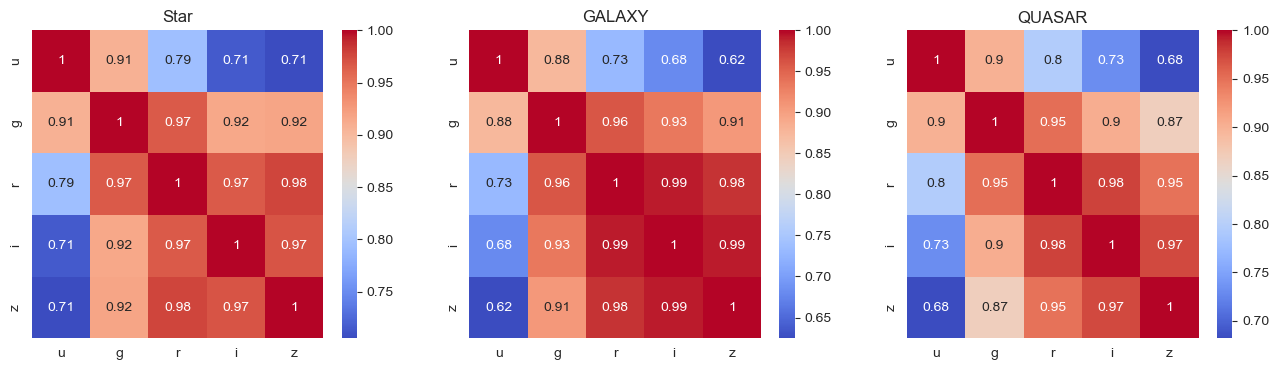

In [30]:
# NEAR OBJECT TO EARTH WILL HAVE A HIGHER RADIATION 
# GALAXY WILL HAVE A LOWER RADIATION 
# QUASAR WILL HAVE A MORE LOWER RADIATION.  

fig, axes = plt.subplots(1, 3, figsize=(16,4)) 
fig.set_dpi(100) 
ax = sns.heatmap(df[df['class'] == 'STAR'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[0], cmap = 'coolwarm', annot=True) 
ax = ax.set_title('Star')
ax = sns.heatmap(df[df['class'] == 'GALAXY'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[1], cmap = 'coolwarm', annot=True) 
ax = ax.set_title('GALAXY')
ax = sns.heatmap(df[df['class'] == 'QSO'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[2], cmap = 'coolwarm', annot=True) 
ax = ax.set_title('QUASAR')

Text(0.5, 1.0, 'Equatorial coordinates')

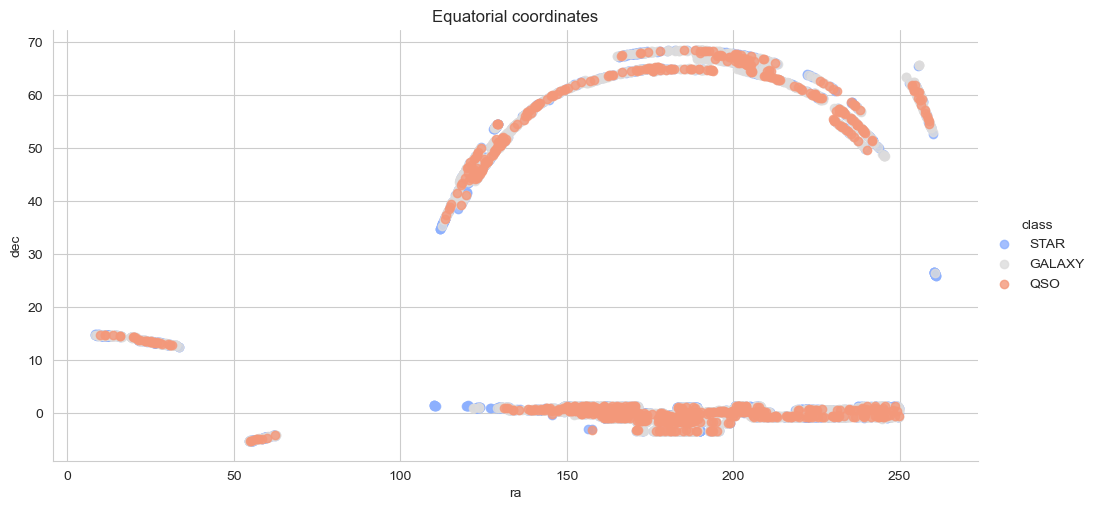

In [31]:
sns.lmplot(x = 'ra', y = 'dec', data = df, hue = 'class', fit_reg=False, palette='coolwarm', aspect = 2) 
plt.title('Equatorial coordinates')

In [32]:
df_encoded = df.copy()
mapp = {'STAR': 0, 'GALAXY':1, 'QSO':3} 
df_encoded['class'] = df_encoded['class'].map(mapp)

In [33]:
from sklearn.decomposition import PCA

In [34]:
df_encoded.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,0,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,0,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,1,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,0,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,0,0.000590,3306,54922,512


In [35]:
pca = PCA(n_components=3)  
ugriz = pca.fit_transform(df_encode[['u', 'g', 'r', 'i', 'z']]) 

ugriz

array([[-1.50720246e+00, -1.37729303e+00, -2.65118562e-01],
       [-1.95757561e-01, -2.84104723e-02, -1.55695489e-01],
       [ 1.29760442e+00, -5.90023138e-01,  1.40338453e-01],
       ...,
       [ 1.48072524e+00,  3.88717075e-01, -1.26646283e-01],
       [ 1.39208832e+00,  1.17003627e-01,  3.88182819e-02],
       [-9.36205074e-01, -1.11321472e+00, -1.12953950e-03]])

In [36]:
ugriz = pd.DataFrame(ugriz)
df_encoded = pd.concat([df_encoded,ugriz], axis = 1)

In [37]:
df_encoded.rename({0:'PCA_1', 1:'PCA_2', 2: 'PCA_3'}, axis = 1, inplace = True)
df_encoded.drop(['u', 'g', 'r', 'i', 'z'], axis = 1, inplace = True)
df_encoded.head()

,objid,ra,dec,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid,PCA_1,PCA_2,PCA_3
0,1.237650e+18,183.531326,0.089693,752,301,4,267,3.722360e+18,0,-0.000009,3306,54922,491,-1.507202,-1.377293,-0.265119
1,1.237650e+18,183.598370,0.135285,752,301,4,267,3.638140e+17,0,-0.000055,323,51615,541,-0.195758,-0.028410,-0.155695
2,1.237650e+18,183.680207,0.126185,752,301,4,268,3.232740e+17,1,0.123111,287,52023,513,1.297604,-0.590023,0.140338
3,1.237650e+18,183.870529,0.049911,752,301,4,269,3.722370e+18,0,-0.000111,3306,54922,510,-1.446117,0.566685,-0.009272
4,1.237650e+18,183.883288,0.102557,752,301,4,269,3.722370e+18,0,0.000590,3306,54922,512,-0.849271,1.287505,-0.397689


In [39]:
scaler = MinMaxScaler() 
sdss = scaler.fit_transform(df_encoded.drop('class', axis = 1))

In [43]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(sdss, df_encoded['class'], test_size=0.3, random_state=42)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
#Logistic regression

from sklearn.linear_model import LogisticRegression
import time 

start_train = time.time() 
logreg = LogisticRegression() 
logreg.fit(X_train, y_train) 
end_train = time.time() 

logreg_train = end_train - start_train 
print('Training time', round(logreg_train, 4)) 

pred = logreg.predict(X_test) 
accuracy_logreg = accuracy_score(y_test, pred) * 100

print('Accuracy Score', round(accuracy_logreg, 2),'%')

Training time 0.2628
Accuracy Score 91.7 %


In [46]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

start_train = time.time() 
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
end_train = time.time() 

neigh_train = end_train - start_train 
print('Training time', round(neigh_train, 4)) 

pred = neigh.predict(X_test) 
accuracy_neigh = accuracy_score(y_test, pred) * 100

print('Accuracy Score', round(accuracy_neigh, 2),'%')

Training time 0.0337
Accuracy Score 89.57 %


In [47]:
from sklearn.naive_bayes import GaussianNB

start_train = time.time() 
gnb = GaussianNB()
gnb.fit(X_train, y_train)
end_train = time.time() 

gnb_train = end_train - start_train 
print('Training time', round(gnb_train, 4)) 

pred = gnb.predict(X_test) 
accuracy_gnb = accuracy_score(y_test, pred) * 100

print('Accuracy Score', round(accuracy_gnb, 2),'%')

Training time 0.0081
Accuracy Score 97.4 %


In [48]:
res = pd.DataFrame({'Algorithm':['Logistic regression','KNN','Naive_bayes'],
                    'Training Time': [logreg_train, neigh_train, gnb_train],
                    'Accuracy': [accuracy_logreg,accuracy_neigh,accuracy_gnb]})
res

,Algorithm,Training Time,Accuracy
0,Logistic regression,0.262801,91.700000
1,KNN,0.033734,89.566667
2,Naive_bayes,0.008143,97.400000
